In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sklearn.datasets
from scipy.stats import multivariate_normal
import pandas as pd
import seaborn

import sys
sys.version_info

sys.version_info(major=3, minor=11, micro=3, releaselevel='final', serial=0)

In [6]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [23]:
ds = sklearn.datasets.load_iris()
#print(ds['DESCR'])

In [9]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [52]:
ds['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
def myplt(ds): 
    colors = ['yellow','purple','red']
    for target_index ,(target_name,color) in enumerate(zip(ds['target_names'],colors)):
        X =  ds['data'][ds['target']== target_index ,:]
        plt.scatter(X[:,2],X[:,3], c = color , label = target_name )
    plt.legend()
    plt.xlabel(ds['feature_names'][2])
    plt.ylabel(ds['feature_names'][3])
    

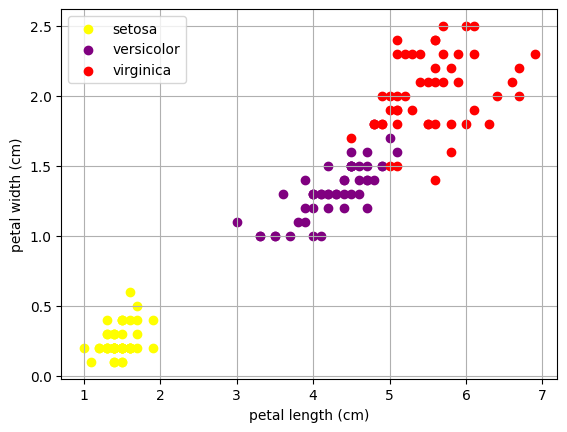

In [45]:
myplt(ds)

In [ ]:
# now we want to distinguish a Virginica from non virginica class 
# the posterior probability is determand with the sigmoid function 
#in case  of a two class model we use the ML to calculate   W, w0 



In [46]:
# firs  the sigmid function: 

def sigmoid(x): 
    return (1 +  np.exp(-x))**-1

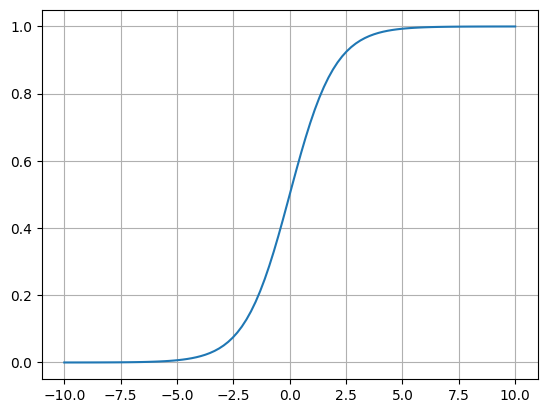

In [49]:
x = np.linspace(-10,10 , num =100 )
plt.plot(x, sigmoid(x))

In [50]:
# what are we  looking for  ? 
# we want to classify the input x to see if  it belongs to the class virginica  
features =  ds['data'][:,2:]
features.shape

(150, 2)

In [58]:
# the labels  here should  be 1 if  the class is virginica 
labels = (ds['target'] == 2)
labels
# why do we need labels  ? -> to compaire the output with the labels and see if the predections were right 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [84]:
# we need to train the  model to update  W and W0 for  the posterior probability 
# we know  --> W(k+1) = W(k) - learning_rate* grad(ML)|w  --- same thing for the w0
D = 2
W = np.zeros((D,))  #  shape  of  two
w0 = np.zeros(())   #   shape of 2

iterations = 1000
learning_rate = 0.05

for _ in range(iterations):
    # apply the gradient on the objectif  function  
    grad_w0 = np.sum(labels - sigmoid(np.matmul(features, W) + w0))
    grad_w = np.sum((labels - sigmoid(np.matmul(features, W) + w0))[:, None] * features, axis=0)# expend  the dimension of the error to be able  to multiply it with the features 
    
    
    assert grad_w0.shape == (), grad_w0.shape
    assert grad_w.shape == (D,), grad_w.shape

    
    W = W + learning_rate * grad_w
    w0 = w0 + learning_rate * grad_w0
    
    assert W.shape == (D,), w.shape
    assert w0.shape == (), w0.shape
    
    
print(W, w0)


[ 9.26826398 26.86713445] -88.92354380325915


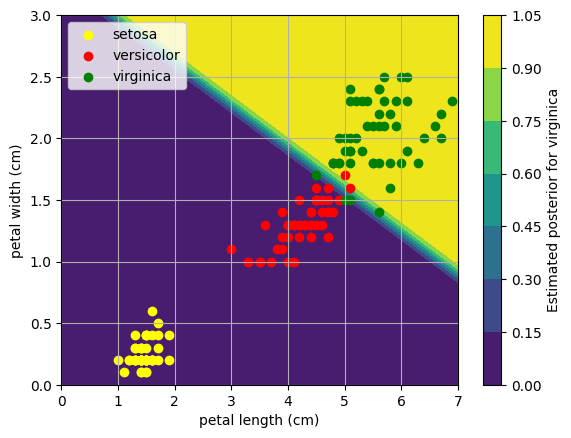

In [85]:
def compute_complete_grid(xlim, ylim, steps):
    x, y = np.meshgrid(
        np.linspace(*xlim, steps),
        np.linspace(*ylim, steps)
    )
    features_grid = np.moveaxis(np.array([x, y]), source=0, destination=-1)
    assert features_grid.shape == (steps, steps, 2), features_grid.shape
    return x, y, features_grid

steps = 100
x, y, features_grid = compute_complete_grid((0, 7), (0, 3), steps=steps)

z = sigmoid(features_grid @ W + w0)

plt.contourf(x, y, z)
plt.clim(0, 1)
plt.colorbar(label='Estimated posterior for virginica')

add_scatter_to_plot(ds)
plt.show()